<a href="https://colab.research.google.com/github/KacperKaczmarczyk/data-science-bootcamp/blob/main/02_pandas/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)


### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.21.6


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
  """Pobiera dane dotyczące notować spółki na giełdzie według symboli na serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-02-08 to 2018-02-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,102.0400,102.6699,98.7750,100.0500,75878304
2023-02-07,101.1700,102.4100,98.0800,102.1100,119501301
2023-02-06,102.9250,103.9484,100.6500,102.1800,81945199
2023-02-03,105.2600,108.7800,102.5200,103.3900,144374828
2023-02-02,110.2450,114.0000,108.8800,112.9100,158154243
...,...,...,...,...,...
2018-02-16,72.8685,73.2900,72.3280,72.4345,89286380
2018-02-15,73.3445,73.4470,71.8420,73.0880,112725360
2018-02-14,70.3125,72.6030,70.1680,72.5525,119040740


In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,102.040,102.6699,98.775,100.05,75878304
2023-02-07,101.170,102.4100,98.080,102.11,119501301
2023-02-06,102.925,103.9484,100.650,102.18,81945199
2023-02-03,105.260,108.7800,102.520,103.39,144374828
2023-02-02,110.245,114.0000,108.880,112.91,158154243


In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-02-08,102.040,102.6699,98.775,100.05,75878304
2023-02-07,101.170,102.4100,98.080,102.11,119501301
2023-02-06,102.925,103.9484,100.650,102.18,81945199
2023-02-03,105.260,108.7800,102.520,103.39,144374828
2023-02-02,110.245,114.0000,108.880,112.91,158154243


In [8]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,120.584429,122.047690,118.966831,120.518483,8.580480e+07
std,34.955693,35.322559,34.532941,34.883235,3.952807e+07
min,67.300000,69.690500,65.350000,67.198000,1.762674e+07
25%,89.530500,90.245000,88.526000,89.465000,5.897420e+07
50%,108.110000,110.990000,106.372000,108.444000,7.496474e+07
75%,158.338000,159.938000,156.250000,158.100000,1.014933e+08
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.205844e+02,3.495569e+01,6.730000e+01,8.953050e+01,1.081100e+02,1.583380e+02,1.872000e+02
high,1257.0,1.220477e+02,3.532256e+01,6.969050e+01,9.024500e+01,1.109900e+02,1.599380e+02,1.886540e+02
low,1257.0,1.189668e+02,3.453294e+01,6.535000e+01,8.852600e+01,1.063720e+02,1.562500e+02,1.848400e+02
close,1257.0,1.205185e+02,3.488323e+01,6.719800e+01,8.946500e+01,1.084440e+02,1.581000e+02,1.865700e+02
volume,1257.0,8.580480e+07,3.952807e+07,1.762674e+07,5.897420e+07,7.496474e+07,1.014933e+08,3.113457e+08


### <a name='a4'></a> Selekcja kolumn

In [11]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-02-08,102.040,102.6699,98.775,100.05,75878304
2023-02-07,101.170,102.4100,98.080,102.11,119501301
2023-02-06,102.925,103.9484,100.650,102.18,81945199
2023-02-03,105.260,108.7800,102.520,103.39,144374828
2023-02-02,110.245,114.0000,108.880,112.91,158154243
2023-02-01,102.530,106.2400,101.240,105.15,80450121
2023-01-31,101.155,103.3484,101.140,103.13,66527253
2023-01-30,101.090,101.7400,99.010,100.55,70691860
2023-01-27,99.530,103.4850,99.530,102.24,87775614


In [12]:
df['open']

Date
2023-02-08    102.040
2023-02-07    101.170
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
Name: open, dtype: float64

In [13]:
df.open

Date
2023-02-08    102.040
2023-02-07    101.170
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
Name: open, dtype: float64

In [14]:
df[['open']]

,open
Date,
2023-02-08,102.040
2023-02-07,101.170
2023-02-06,102.925
2023-02-03,105.260
2023-02-02,110.245
2023-02-01,102.530
2023-01-31,101.155
2023-01-30,101.090
2023-01-27,99.530


In [15]:
df[['open','close']]

,open,close
Date,,
2023-02-08,102.040,100.05
2023-02-07,101.170,102.11
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24


In [16]:
df.iloc[:,0]

Date
2023-02-08    102.040
2023-02-07    101.170
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
Name: open, dtype: float64

In [17]:
df.iloc[:,[0,3]]

,open,close
Date,,
2023-02-08,102.040,100.05
2023-02-07,101.170,102.11
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24


In [18]:
df.iloc[:,3:5]

,close,volume
Date,,
2023-02-08,100.05,75878304
2023-02-07,102.11,119501301
2023-02-06,102.18,81945199
2023-02-03,103.39,144374828
2023-02-02,112.91,158154243
2023-02-01,105.15,80450121
2023-01-31,103.13,66527253
2023-01-30,100.55,70691860
2023-01-27,102.24,87775614


In [21]:
df.iloc[:,-3:]

,low,close,volume
Date,,,
2023-02-08,98.775,100.05,75878304
2023-02-07,98.080,102.11,119501301
2023-02-06,100.650,102.18,81945199
2023-02-03,102.520,103.39,144374828
2023-02-02,108.880,112.91,158154243
2023-02-01,101.240,105.15,80450121
2023-01-31,101.140,103.13,66527253
2023-01-30,99.010,100.55,70691860
2023-01-27,99.530,102.24,87775614


### <a name='a5'></a>  Selekcja wierszy

In [22]:
df.iloc[0]

open      1.020400e+02
high      1.026699e+02
low       9.877500e+01
close     1.000500e+02
volume    7.587830e+07
Name: 2023-02-08 00:00:00, dtype: float64

In [23]:
df.iloc[0:3]

,open,high,low,close,volume
Date,,,,,
2023-02-08,102.040,102.6699,98.775,100.05,75878304
2023-02-07,101.170,102.4100,98.080,102.11,119501301
2023-02-06,102.925,103.9484,100.650,102.18,81945199


In [24]:
df.loc['20230206']

,open,high,low,close,volume
Date,,,,,
2023-02-06,102.925,103.9484,100.65,102.18,81945199


In [25]:
df

,open,high,low,close,volume
Date,,,,,
2023-02-08,102.040,102.6699,98.775,100.05,75878304
2023-02-07,101.170,102.4100,98.080,102.11,119501301
2023-02-06,102.925,103.9484,100.650,102.18,81945199
2023-02-03,105.260,108.7800,102.520,103.39,144374828
2023-02-02,110.245,114.0000,108.880,112.91,158154243
2023-02-01,102.530,106.2400,101.240,105.15,80450121
2023-01-31,101.155,103.3484,101.140,103.13,66527253
2023-01-30,101.090,101.7400,99.010,100.55,70691860
2023-01-27,99.530,103.4850,99.530,102.24,87775614


In [27]:
df.loc['20230206':'20230208']

,open,high,low,close,volume
Date,,,,,
2023-02-08,102.04,102.6699,98.775,100.05,75878304
2023-02-07,101.17,102.4100,98.080,102.11,119501301


### <a name='a6'></a> Obliczanie nowych kolumn

In [28]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 945 entries, 2023-02-08 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    945 non-null    float64
 1   High    945 non-null    float64
 2   Low     945 non-null    float64
 3   Close   945 non-null    float64
 4   Volume  945 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.3 KB


In [29]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,37.43,37.58,34.50,36.83,109597829
2023-02-07,33.66,35.06,33.41,34.90,59374036
2023-02-06,33.53,34.21,32.90,33.90,33594934
2023-02-03,32.17,33.95,32.15,33.09,25804879
2023-02-02,32.42,33.47,32.42,33.05,32045470


In [30]:
df.describe()

,Open,High,Low,Close,Volume
count,945.000000,945.000000,945.000000,945.000000,9.450000e+02
mean,37.253226,38.022899,36.413772,37.219217,2.554831e+07
std,9.812406,9.885167,9.656996,9.749618,1.667207e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,29.720000,30.410000,29.120000,29.750000,1.570857e+07
50%,34.780000,35.340000,33.940000,34.700000,2.178182e+07
75%,44.190000,44.890000,43.390000,44.000000,3.070479e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [31]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-08,37.43,37.58,34.50,36.83,109597829
2023-02-07,33.66,35.06,33.41,34.90,59374036
2023-02-06,33.53,34.21,32.90,33.90,33594934


In [32]:
df['Avearage'] = (df.Open + df.Close)/2.0
df

,Open,High,Low,Close,Volume,Avearage
Date,,,,,,
2023-02-08,37.43,37.58,34.50,36.83,109597829,37.130
2023-02-07,33.66,35.06,33.41,34.90,59374036,34.280
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735
...,...,...,...,...,...,...
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135


In [34]:
df = df.sort_index()
df

,Open,High,Low,Close,Volume,Avearage
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240
...,...,...,...,...,...,...
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715


In [37]:
df['Close_shift'] = df[['Close']].shift(1)
df.head()

,Open,High,Low,Close,Volume,Avearage,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [39]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily Change,Daily_Change
Date,,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414,0.041414


In [43]:
df

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630,33.05,0.001210
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715,33.09,0.024479


In [44]:
df.Daily_Change.min()

-0.21628767847699626

In [45]:
df.Daily_Change.max()

0.3825910931174088

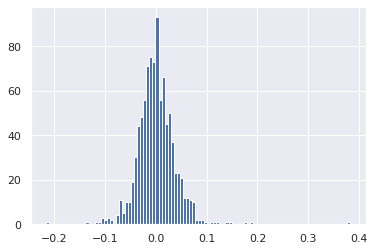

In [47]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

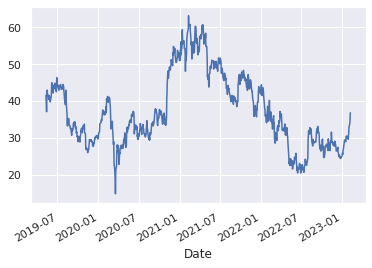

In [48]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [49]:
df

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630,33.05,0.001210
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715,33.09,0.024479


In [50]:
df.Daily_Change > 0

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15     True
2019-05-16     True
              ...  
2023-02-02     True
2023-02-03     True
2023-02-06     True
2023-02-07     True
2023-02-08     True
Name: Daily_Change, Length: 945, dtype: bool

In [52]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327
...,...,...,...,...,...,...,...,...
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630,33.05,0.001210
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715,33.09,0.024479


In [53]:
df_positive.Daily_Change.mean()

0.0280048941223953

In [54]:
df_negative = df[df.Daily_Change < 0]
df_negative

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-13,38.79,39.2400,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-17,41.98,43.2900,41.270,41.91,20225687,41.945,43.00,-0.025349
2019-05-20,41.19,41.6800,39.460,41.59,29222330,41.390,41.91,-0.007635
2019-05-21,42.00,42.2400,41.250,41.50,10802851,41.750,41.59,-0.002164
2019-05-22,41.05,41.2800,40.500,41.25,9089469,41.150,41.50,-0.006024
...,...,...,...,...,...,...,...,...
2023-01-17,29.44,29.7800,28.955,29.20,20816486,29.320,29.44,-0.008152
2023-01-18,29.95,30.0900,28.885,28.96,25257235,29.455,29.20,-0.008219
2023-01-24,25.71,31.2000,25.710,29.93,14464364,27.820,30.53,-0.019653


In [55]:
df_negative.Daily_Change.mean()

-0.02532474364813697

In [56]:
df.Close == df.High

Date
2019-05-10    False
2019-05-13    False
2019-05-14     True
2019-05-15    False
2019-05-16    False
              ...  
2023-02-02    False
2023-02-03    False
2023-02-06    False
2023-02-07    False
2023-02-08    False
Length: 945, dtype: bool

In [57]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [58]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894


In [61]:
df[df.index > '20211101']

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2021-11-02,44.34,44.350,42.3309,42.89,28002584,43.615,44.36,-0.033138
2021-11-03,45.33,46.260,44.7100,45.72,38499594,45.525,42.89,0.065983
2021-11-04,45.54,46.530,44.9900,45.27,31903047,45.405,45.72,-0.009843
2021-11-05,47.50,48.740,46.6100,47.19,45641491,47.345,45.27,0.042412
2021-11-08,47.08,47.645,45.8200,45.89,25257852,46.485,47.19,-0.027548
...,...,...,...,...,...,...,...,...
2023-02-02,32.42,33.470,32.4200,33.05,32045470,32.735,31.49,0.049540
2023-02-03,32.17,33.950,32.1500,33.09,25804879,32.630,33.05,0.001210
2023-02-06,33.53,34.210,32.9000,33.90,33594934,33.715,33.09,0.024479


In [63]:
df[(df.index >= '20211101') & (df.index <= '20211130')]

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2021-11-01,44.07,45.0250,43.6500,44.36,20983925,44.215,43.82,0.012323
2021-11-02,44.34,44.3500,42.3309,42.89,28002584,43.615,44.36,-0.033138
2021-11-03,45.33,46.2600,44.7100,45.72,38499594,45.525,42.89,0.065983
2021-11-04,45.54,46.5300,44.9900,45.27,31903047,45.405,45.72,-0.009843
2021-11-05,47.50,48.7400,46.6100,47.19,45641491,47.345,45.27,0.042412
2021-11-08,47.08,47.6450,45.8200,45.89,25257852,46.485,47.19,-0.027548
2021-11-09,45.91,45.9800,43.6800,45.51,33588854,45.710,45.89,-0.008281
2021-11-10,44.90,45.2500,42.6000,43.38,33712210,44.140,45.51,-0.046803
2021-11-11,43.32,43.7200,42.4400,43.28,27307792,43.300,43.38,-0.002305


In [65]:
df[(df.index == '20211109') | (df.index == '20211123')]

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2021-11-09,45.91,45.9800,43.68,45.51,33588854,45.71,45.89,-0.008281
2021-11-23,42.38,43.1399,41.60,42.68,18099396,42.53,42.60,0.001878


In [66]:
df

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630,33.05,0.001210
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715,33.09,0.024479


In [68]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Avearage,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,0.048094
